# Mecánica Celeste
## 2023-II
## Set de Problemas No 3: Sistemas rotantes y CRTBP

**1. Péndulo de Foucault.** Considere un péndulo de masa $m$ que se balancea con frecuencia $\gamma=\sqrt[]{g l^{-1}}$, donde $g$ es la aceleración de la gravedad y $l$ es la longitud del péndulo.

(a) Demuestre que el plano en el que se mueve el péndulo gira en dirección de las manecillas del reloj y tarda un tiempo

$$T=\frac{2\pi}{\Omega \sin\phi}$$

en dar una vuelta, donde $\Omega$ es la rapidez angular de rotación de la Tierra y $\phi$ la latitud del lugar en donde está el péndulo.

(b) Realizar un código para calcular la velocidad ángular de rotación del plano del péndulo y el periodo $T$. Graficar para distintos valores de $\phi$

Tengamos en cuenta el siguiente diagrama donde $\lambda$ es la latitud equivalente a $\phi$ :

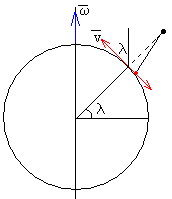

Teniendo el cuenta el diagrama podemos encontrar que la velocidad angular en ndirección "z", esta definida por:

$$\vec{\Omega_z} = \Omega cos(\frac{\pi}{2}-\phi)\hat{k}$$

$$\vec{\Omega_z}= \Omega sin(\phi)\hat{k}$$

La aceleración en el sistema rotante esta definida como:

$$\vec{a} = \vec{a}' + \vec{\Omega} X (\vec{\Omega} X \vec{r}') + 2\vec{\Omega} X \vec{v}'+\vec{\Omega} X \vec{r}'$$

En el caso de la tierra la magnitud de $\Omega$ es:

$$\Omega = \frac{2\pi}{86400 s} = 7.272 *10^{-5} rad/s $$

es demasiado pequeña y este valor al cuadrado es aún más pequeño, entonces esto hace que podam,os despreciar algunos terminos de la expresión para la aceleración:

$$\vec{a} = \vec{a}' + 2\vec{\Omega} X \vec{v}'  $$ 

analizando el problema dinámicamente, tenemos que:

$$\ddot{\theta} = \frac{-g}{l}sin(\theta)$$

si $\theta$<<1 entonces se puede aproximar $sin(\theta)=\theta$, y a su vez con este angulo de movimiento tan pequeño podemos aproximar que $\theta= r$

$$\ddot{r} = \frac{-g}{l}r$$

a su vez:

$$\vec{r} = r_0 cos(\gamma t) \hat{r}$$

para la velocidad:

$$V = w  r_0 cos(w t)$$

w: Frecuencia 

$$\vec{V}'=-\gamma r_0 sin(\gamma t) \hat{r} + r_0 cos(\gamma t)  \dot{\alpha} \hat{\alpha} $$

así la aceleración de coriolis queda como:

$$2 \vec{\Omega}X\vec{V}' = 2\Omega_z r_0 cos(\gamma t) \dot{\alpha}\hat{r}-2\Omega \gamma r_0 sin (\gamma t) \hat{\alpha}$$

Analicemos la aceleración generalizada:

$$\ddot{\vec{r}}=\frac{d}{dt}(\dot{r}\hat{r} + r \dot{\alpha}\hat{\alpha})= \hat{r} (\ddot{r} - r \dot{\alpha}^2 ) + \hat{\alpha}(2 \dot{\gamma} \dot{\alpha} + \gamma \ddot{\alpha}) $$

Igualando las expresiones para la aceleración:

$$\hat{r} (\ddot{r} - r \dot{\alpha}^2 ) + \hat{\alpha}(2 \dot{\gamma} \dot{\alpha} + \gamma \ddot{\alpha}) = -\gamma r \hat{\gamma} +2\Omega_z r_0 cos(\gamma t) \dot{\alpha}\hat{r}+2\Omega \gamma r_0 sin (\gamma t) \hat{\alpha}$$

la unica direccion que importa para nuestro objetivo es la dirección tangencial $\hat{\alpha}$:

$$2 \dot{\gamma} \dot{\alpha} + \gamma \ddot{\alpha} = 2\Omega \gamma r_0 sin (\gamma t)$$

$\ddot{\alpha}=0$, teniendo en cuenta esto y simplificando obtenemos que:

$$\dot{\alpha} = \Omega sin(\phi)$$

además $T = \frac{2\pi}{\dot{\alpha}} $

dejandonos que:

> $$T=\frac{2\pi}{\Omega sin(\phi)}$$
---

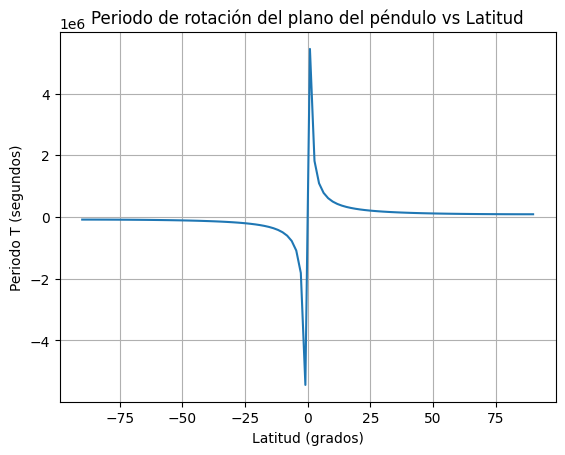

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Definir constantes
Omega = 7.2722e-5  # Velocidad angular de rotación de la Tierra en rad/s

def calcular_periodo(latitud):
    # Convertir la latitud a radianes
    latitud_rad = np.deg2rad(latitud)
    # Calcular el periodo T
    T = (2 * np.pi) / (Omega * np.sin(latitud_rad))
    return T

# Crear un array de latitudes desde -90 hasta 90 grados
latitudes = np.linspace(-90, 90, 100)
# Calcular los periodos para cada latitud
periodos = [calcular_periodo(lat) for lat in latitudes]

# Graficar
plt.plot(latitudes, periodos)
plt.xlabel('Latitud (grados)')
plt.ylabel('Periodo T (segundos)')
plt.title('Periodo de rotación del plano del péndulo vs Latitud')
plt.grid(True)
plt.show()


**2. Lanzamiento vertical.** Un cuerpo se lanza verticalmente hacia arriba con una velocidad $v_{0}$. Demuestre que, debido a la fuerza de coriolis, el cuerpo caerá en un punto desplazado hacia el oeste por una distancia igual a

$$\Delta x=\frac{4}{3}\Omega\cos\phi\frac{v_0^{3}}{g^2},$$

siendo $\Omega$ el modulo de la velocidad angular de la Tierra (supóngala constante), $\phi$ la latitud del lugar donde se lanzó el móvil y $g$ la aceleración debida a la gravedad. (*Ayuda*: en primer lugar, suponga que, a medida que el cuerpo está en el aire, la única componente de la velocidad que afecta a la aceleración de coriolis es la componente radial. ¿Cómo varía dicha componente en el tiempo si $g$ es constante?)

Realice un gráfico de $\Delta x$ contra $\phi$, para valor de $v_0$ dado.

Si definimos el sistema coordenado de manera tal  que el eje z apunte en direccion perpendicular a la superficie de la tierra, el eje x en direccion al polo norte terrestre y el eje y paralelo al ecuador terrestre, así entonces el vector velocidad angular que apunta en la dirección del eje de rotacion terrestre solo tendra componente en el eje  x,z; así entonces el vector velocidad angular depende de la latitud y descrito en componentes es:

$$\vec{\Omega} = \Omega sin(90-\phi) \hat{x} + \Omega cos(90-\phi) \hat{z} $$

$$\vec{\Omega} = \Omega cos(\phi) \hat{x} + \Omega sin(\phi) \hat{z} $$

----

**3. Vectores relativos en el problema de 3 cuerpos.**
Dado el problema de los 3 cuerpos,
\begin{eqnarray}
\vec{r}_{1} & = & \vec{r} - \vec{r}_1 = [x(t) - x_1]\hat{i} + y(t)\hat{j} + z(t) \hat{k}, \\
\vec{r}_{2} & = & \vec{r} - \vec{r}_2 = [x(t) - x_2]\hat{i} + y(t)\hat{j} + z(t) \hat{k}
\end{eqnarray}
son las posiciones del tercer cuerpo con respecto a los otros dos en el sistema rotante.
Muestre detalladamente que se satisfacen las relaciones algebraicas

> $a$)
$$
-\frac{\vec{r}_{1} \cdot \dot{\vec{r}}}{r_{1}^3} = \frac{d}{dt}\left(\frac{1}{r_{1}}\right)
$$

> $b$)
$$
 -(1-\alpha)\frac{\vec{r}_{1}}{r^3_{1}} - \alpha\frac{\vec{r}_{2}}{r^3_{2}} - \hat{k}\times(\hat{k}\times \vec{r}) =- \nabla \left[-\frac{(1-\alpha)}{r_{1}}-\frac{\alpha}{r_{2}}-\frac{1}{2}(x^2 + y^2)\right]
$$

**Solución**

> literal a

primero veamos la derivada 

$$\frac{1}{r_1}=\frac{1}{\sqrt{(x-x_1)^2+y^2 + z^2}}$$

$$\frac{d}{dt}(\frac{1}{r_1})=\frac{-1}{2}((x-x1)^2 +y^2+z^2)^{-3/2} (2 (x-x1)\dot{x} + 2y\dot{y} + 2z \dot{z})$$

$$\frac{d}{dt}(\frac{1}{r_1})=- \frac{(x-x1)\dot{x} + y\dot{y} + z \dot{z}}{r_{01}^3}$$

Ahora tratemos de llevar al otro lado de la igualdad a la misma expresión:

$$\vec{r_1}=x1\hat{i}+0\hat{j}+0\hat{k}$$
$$\vec{r_2}=x2\hat{i}+0\hat{j}+0\hat{k}$$
$$\vec{r}=x\hat{i}+y\hat{j}+z\hat{k}$$
$$\vec{\dot{r}}=\dot{x}\hat{i}+\dot{y}\hat{j}+\dot{z}\hat{k}$$

haciendo $-\frac{\vec{r}_{1} \cdot \dot{\vec{r}}}{r_{1}^3}$:

$$-\frac{\vec{r}_{1} \cdot \dot{\vec{r}}}{r_{1}^3} = - \frac{(x-x1)\dot{x} + y\dot{y} + z \dot{z}}{r_{01}^3}$$
así que:

$$
-\frac{\vec{r}_{1} \cdot \dot{\vec{r}}}{r_{1}^3} = \frac{d}{dt}\left(\frac{1}{r_{1}}\right)
$$

> literal b
<!--
$$-(1-\alpha)\frac{\vec{r_1}}{r_1^3}- \alpha \frac{\vec{r_2}}{r_2^3}-\hat{k}X(\hat{h} X \vec{r})$$
-->

Veamos el gradiente:

$$\nabla \frac{1-\alpha}{r_1}+\nabla \frac{\alpha}{r_2}+\nabla \frac{1}{2}(x^2+y^2)$$

(1)+(2)+(3)

resolviendo (1):

$$\hat{e}_x\frac{\partial}{\partial x}(\frac{1-\alpha}{\sqrt{(x-x1)^2+y^2+z^2}})=-\frac{(1-\alpha)(x-x_1)}{r_{01}^3}\hat{e}_x$$

$$\hat{e}_y\frac{\partial}{\partial y}(\frac{1-\alpha}{\sqrt{(x-x1)^2+y^2+z^2}})=-\frac{(1-\alpha)(y)}{r_{01}^3}\hat{e}_y$$

$$\hat{e}_z\frac{\partial}{\partial z}(\frac{1-\alpha}{\sqrt{(x-x1)^2+y^2+z^2}})=-\frac{(1-\alpha)(z)}{r_{01}^3}\hat{e}_z$$

entonces:

$$\nabla \frac{1-\alpha}{r_1}=\frac{1-\alpha}{r_1^3}\vec{r_1}$$

ahora:
$$\nabla \frac{\alpha}{r_{02}}=-\frac{\alpha}{r_{02}^3}r$$

$$\nabla \frac{1}{2}(x^2+y^2)=x\hat{e}_x + y\hat{e}_y$$

es facil ver con las reglas del producto cruz que:

$$- \hat{k}\times(\hat{k}\times \vec{r})=x\hat{e}_x + y\hat{e}_y=\nabla \frac{1}{2}(x^2+y^2)$$

uniendo todo podemos obtener que:

$$
 -(1-\alpha)\frac{\vec{r}_{1}}{r^3_{1}} - \alpha\frac{\vec{r}_{2}}{r^3_{2}} - \hat{k}\times(\hat{k}\times \vec{r}) =- \nabla \left[-\frac{(1-\alpha)}{r_{1}}-\frac{\alpha}{r_{2}}-\frac{1}{2}(x^2 + y^2)\right]
$$

----

**4. Constante de Jacobi desde otro sistema de referencia.**
La constante de Jacobi en el sistema rotante del problema de los tres cuerpos se puede escribir como

$$
C_J = 2\frac{(1-\alpha)}{r_{1}} + 2\frac{\alpha}{r_{2}} + x^2 + y^2-v^2
$$

A partir de la posición $(\xi, \eta, \zeta)$ de $m_3$ en el sistema inercial ubicado en el centro de masa de $m_1$ y $m_2$ y de la transformación de unas coordenadas a otras

$$
\left(\! \begin{array}{c}
   \xi \\
   \eta \\
   \zeta
   \end{array} \! \right)= \left(\!\!\! \begin{array}{ccc}
   \cos nt & -\sin nt & 0\\
   \sin nt & \cos nt & 0\\
   0 & 0 & 1
   \end{array} \!\!\!\right)\left(\! \begin{array}{c}
   x \\
   y \\
   z
   \end{array} \! \right),
$$

demuestre que la constante de Jacobi se puede escribir como

$$
C_J = -(\dot{\xi}^2 + \dot{\eta}^2 + \dot{\zeta}^2) + 2\frac{(1-\alpha)}{r_1} + 2\frac{\alpha}{r_2} + 2(\xi \dot{\eta} - \eta \dot{\xi})
$$

**Solución**

Para poder realizar este proceso la idea es llevar todo en terminos de las varibales del nuevo sistema coordenado, para el caso de la matriz dada nos podemos dar de cuenta que es una matriz ortogonal por tanto $A^{-1}=A^T$, así que:
$$
\begin{equation}
\begin{bmatrix}
   \cos nt & \sin nt & 0 \\
   -\sin nt & \cos nt & 0 \\
   0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
   \xi \\
   \eta \\
   \zeta
\end{bmatrix} =
\begin{bmatrix}
   x \\
   y \\
   z
\end{bmatrix}
\end{equation}
$$

$$x= \xi cos(nt) + \eta sin(nt) +0$$
$$y= \xi sin(nt) - \eta cos(nt) +0$$
$$z= 0 +0 + \zeta$$

Evaluemos $x^2+y^2$

$$x^2+y^2=(\xi cos(nt) + \eta sin(nt))^2 +  (\xi sin(nt) - \eta cos(nt))^2$$
 
Resolviendo los cuadrado cancelando terminos y utlizando la identidad $sin^2x+cos^2x=1$, podemos obtener que:

$$x^2+y^2=\xi^2 +\eta^2$$

Ahora sabemos que $v^2 = \dot{x}^2 + \dot{y}^2 + \dot{z}^2$

$$\dot{x} = -\xi \sin nt + \eta \cos nt + \dot{\xi} \cos nt + \dot{\eta} \sin nt\\
\dot{x} = (-\xi+\dot{\eta})\sin nt +(\eta + \dot{\xi}) \cos nt\\
\dot{y} = -\xi \cos nt - \dot{\xi} \sin nt - \eta \sin nt + \dot{\eta} \cos nt \\
\dot{y} = \left( \dot{\eta} - \xi \right) \cos nt - \left( \dot{\xi} + \eta \right) \sin nt \\
\dot{z} = \dot{\zeta}\\$$

Reemplazando tenemos que:

$$V^2 = [(-\xi+\dot{\eta})\sin nt +(\eta + \dot{\xi}) \cos nt]^2 +[\left( \dot{\eta} - \xi \right) \cos nt - \left( \dot{\xi} + \eta \right) \sin nt ]^2 + \dot{\zeta}^2$$

Resolviendo  tenemos que:

$$v^2 = \dot{\eta}^2-2\dot{\eta} \xi +\xi^2+\dot{\xi}^2+ \eta^2 + \dot{\zeta}^2$$

reemplazando $v^2 y x^2 + y^2$, en la constante de jacobi, me queda que:

$$C_j = 2\frac{(1-\alpha)}{r_{1}} + 2\frac{\alpha}{r_{2}} + \xi^2 +\eta^2 -(\dot{\eta}^2-2\dot{\eta} \xi +\xi^2+\dot{\xi}^2+ \eta^2 + \dot{\zeta}^2)$$

dejandonos que:

$$
C_J = -(\dot{\xi}^2 + \dot{\eta}^2 + \dot{\zeta}^2) + 2\frac{(1-\alpha)}{r_1} + 2\frac{\alpha}{r_2} + 2(\xi \dot{\eta} - \eta \dot{\xi})
$$

---

**5. Ecuación de la curva límite.** Considere una partícula de prueba que está confinada a moverse en el plano $xy$, formando un sistema de tres cuerpos con otro par de objetos masivos. Demuestre que la ecuación de la *curva limite* (que separa las regiones donde la partícula puede moverse y donde no) es

$$
(1-\alpha)\Big(r_1^2 + \frac{2}{r_1}\Big) + \alpha \Big(r_2^2 + \frac{2}{r_2}\Big) = C_J + \alpha(1-\alpha).
$$

A partir de esta expresión, demuestre que el valor mínimo de la constante de Jacobi $C$ es

$$
\displaystyle C_{\text{min}} = 3-\alpha(1-\alpha)
$$

Partiendo de Cj con v=0, ya que en este valor la velocidad pasa de ser positiva a negativa así que esto sería lo marcaría la curva límite:

$$
C_J = 2\frac{(1-\alpha)}{r_{1}} + 2\frac{\alpha}{r_{2}} + x^2 + y^2
$$

ahora consideremos las posiciones de la particula de prueba  respecto a las otras masas:

Con respecto a la masa 1:

$$\vec{r_{01}} = \vec{r_1} - \vec{r_0} = (x \hat{i}+y\hat{j}+z\hat{k}-(-\alpha \hat{i}$$

$$r_{01}^2 = (x+\alpha)^2 + y^2=x^2+2x\alpha+\alpha^2+y^2$$

de la anterior expresion podemos obtner que:

$$x^2 +y^2 =r_{01}^2 -2x\alpha-\alpha^2 $$

Con respecto a la masa 2:

$$\vec{r_{02}} = \vec{r_2} - \vec{r_0} = (x \hat{i}+y\hat{j}+z\hat{k}-(1-\alpha) \hat{i}$$

$$r_{02}^2 = x^2+2x\alpha-2x+\alpha^2-2\alpha+1+y^2$$

haciendo $r_{01}^2 -r_{02}^2 $:

$$r_{01}^2 -r_{02}^2= 2x +2 \alpha-1$$

$$2x = (r_{01}^2 -r_{02}^2) - 2 \alpha+1$$

reemplazando este 2x en la expresion que habiamos obtenido para $x^2 +y^2$

$$x^2 +y^2 =r_{01}^2 -((r_{01}^2 -r_{02}^2) - 2 \alpha+1)\alpha-\alpha^2$$

$$x^2 +y^2 =r_{01}^2(1-\alpha) + \alpha r_{02}^2 + \alpha^2 - \alpha$$

reemplazando $x^2 +y^2$ en $C_j$, es fácil obtener que:

> $$(1-\alpha)\Big(r_1^2 + \frac{2}{r_1}\Big) + \alpha \Big(r_2^2 + \frac{2}{r_2}\Big) = C_J + \alpha(1-\alpha)$$

Para hallar el mínimo podemos ayudarnos de la derivada parcial evaluada en 0:

$$\frac{\partial}{\partial r_{01}} ({(1-\alpha)(\frac{2}{r_{01}}+r_{01}^2)})=(1-\alpha)(\frac{-2}{r_{01}}+2r_{01})=0$$

por sentido físico:

$$\frac{-2}{r_{01}}+2r_{01}=0$$

entonces:

$$r_{01}=1$$

con respecto a $r_{02}$ se puede hacer el mismo proceso pudiendo obtener que también es igual a 1,

reemplando esto en Cj, podemos obtener que:

$$
\displaystyle C_{\text{min}} = 3-\alpha(1-\alpha)
$$

---

**6. Captura de cometas.** Un cometa se aproxima al sol en una órbita parabólica con distancia al perihelio $r_p$ e inclinación $i$ (respecto al plano orbital de Júpiter).

(a) Si su órbita es perturbada por un encuentro cercano con Júpiter, de modo que su órbita se convierte en una elipse de semieje mayor $a'$, excentricidad $e'$ e inclinación $i'$, demuestre que:

\begin{equation}
\sqrt{2r_p} \cos{i} \simeq \frac{1}{2a'} + \sqrt{(1-e'^2)a'} \cos{i'},
\end{equation}

(b) Si en cambio su órbita final continúa siendo parabólica, muestre que la relación de las inclinaciones orbitales antes y después de la interacción se escribe como:

$$
\cos i_2 = \sqrt{\frac{q_1}{q_2}}\cos i_1
$$

donde $q_1$ y $q_2$ son las distancias al perihelio de la orbita inicial y final respectivamente.

veamos una definción:

$$a(1-e)=q$$
$$q=r_p$$


El parámetro de Tisseran esta definido como:

$$T = \frac{1}{a} + 2 cosi \sqrt{a(1-e^2)}$$



el parámetro de Tisserand se conserva para el cometa después de la perturbacióin de jupiter, osea que da el mismo valor antes y después de la perturbación, así que veamos este parámetro antes de la perturbación:

debemos tener en cuenta que para una parabola $a -> \infin$, además con una e=1 (la de una parabola) $a(1-e)(1+1)=2r_p$

$$T_i =2 cosi \sqrt{2r_p} $$

Ahora veamos a T después de la perturbación:

$$T_f = \frac{1}{a'} + 2 cosi' \sqrt{a'(1-e'^2)}$$

como $T_i=T_f$, entonces:

$$2 cosi \sqrt{2r_p} = \frac{1}{a'} + 2 cosi' \sqrt{a'(1-e'^2)}$$

> $$ cosi \sqrt{2r_p} = \frac{1}{a'} +  cosi' \sqrt{a'(1-e'^2)}$$

si la segunda orbita sigue una orbita parábolica $a'->\infin$:

$$ cosi \sqrt{2r_p} =   cosi' \sqrt{2r_p'}$$

lllevandolo a las variables del problema $q=r_p$:

> $$\cos i_2 = \sqrt{\frac{q_1}{q_2}}\cos i_1$$

---

**7. Parametro de Tisserand para familias de cometas.** Dependiendo de propiedades como el período orbital ($P$) y la distancia al perihelio ($q$), los cometas son agrupados en distintas familias. Estadísticamente se ha observado que los miembros de estas familias poseen parámetros de Tisserand relativos a Júpiter ($T_J$) bastante característicos y acotados. Así, los cometas que tienen $P<20$ años y $q<2$ AU (cometas de período corto) presenta un parámetro de Tisserand entre $2<T_J<3$, los cometa de la familia de Júpiter con  $P<20$ años y $2<q<5$ AU tienen $2.5<T_J<3$ y los de tipo Halley con $20<P<200$ años (cometas de periodo largo) años poseen $T_J<2$. Demuestre estas cotas para $T_J$ seleccionando un cometa de cada familia y calculando su parámetro de Tisserand $T_J$.

**8. Otra forma de la constante de Jacobi.** Si definimos

\begin{equation}
  \Phi(x,y,z) = \frac{1}{2}(x^2+y^2) + \frac{1-\alpha}{r_1} + \frac{\alpha}{r_2} + \frac{1}{2} \alpha (1-\alpha)
\end{equation}

muestre que la cuadratura de Jacobi se puede escribir de la forma

\begin{equation}
  \dot{x}^2 + \dot{y}^2 + \dot{z}^2 = 2\Phi - C.
\end{equation}

Muestre que $C$ toma el mismo valor en $L_4$ y $L_5$, independiente de $\alpha$, y encuentre este valor. Muestre además que

\begin{equation}
  2\Phi = (1-\alpha)\left(r_1^2 + \frac{2}{r_1}\right) + \alpha \left(r_2^2 + \frac{2}{r_2}\right).
\end{equation}